In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

In [3]:
data = pd.read_csv('/content/drive/MyDrive/per_game_data.csv')
data.head()
col_names = data.columns
col_names = list(col_names)
col_names

['Unnamed: 0',
 'Rk',
 'Player',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '2P',
 '2PA',
 '2P%',
 '3P',
 '3PA',
 '3P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Year']

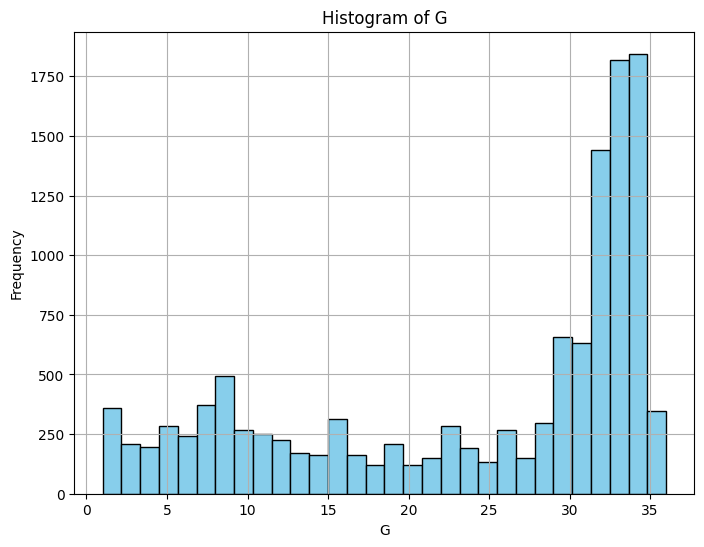

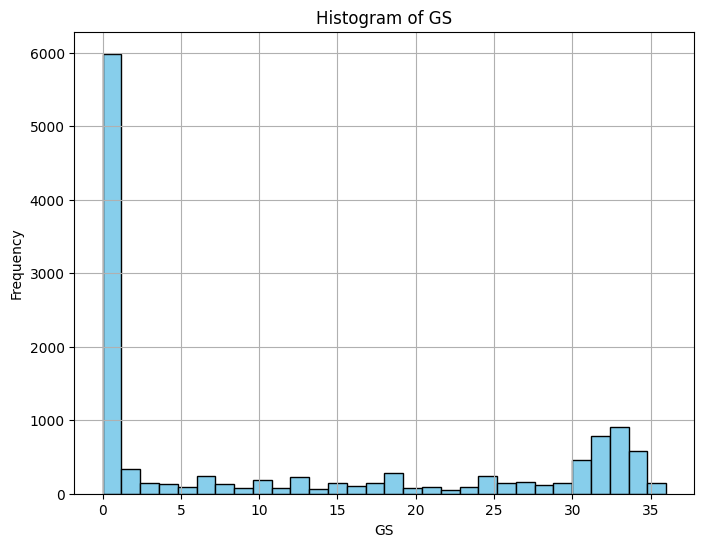

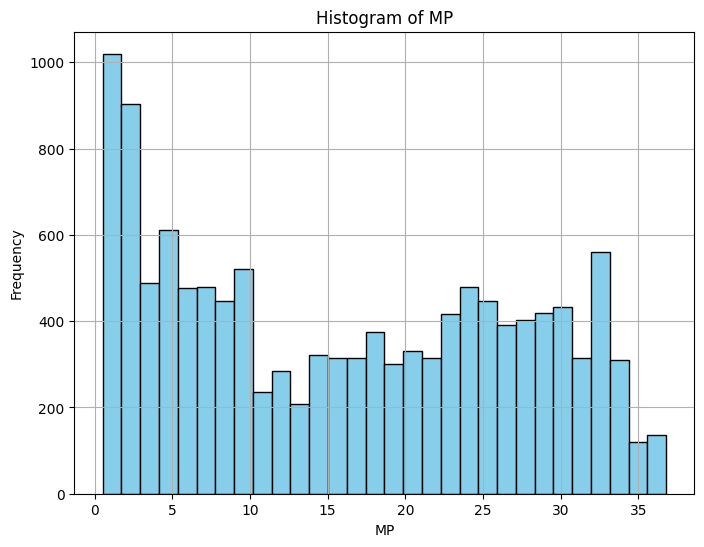

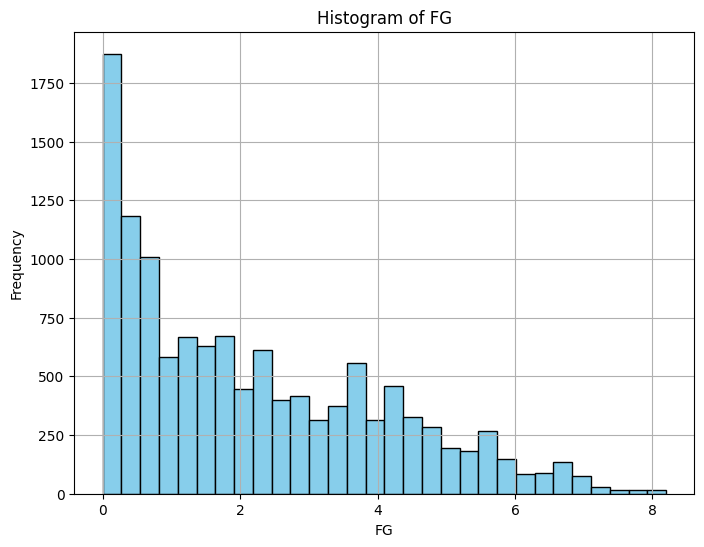

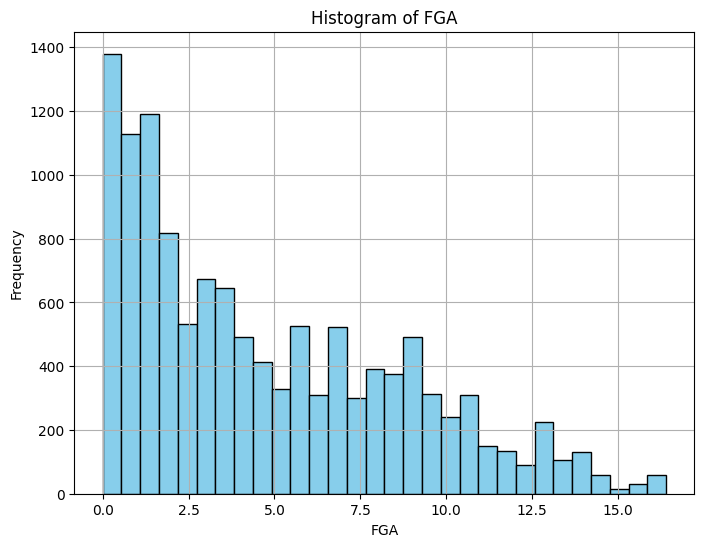

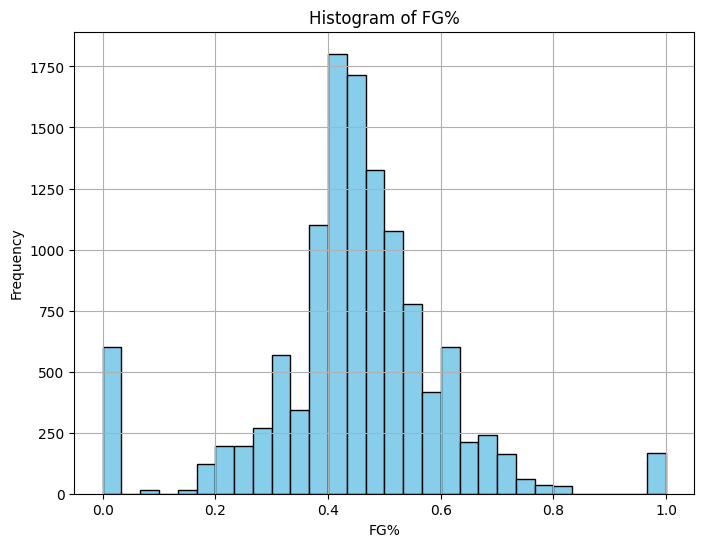

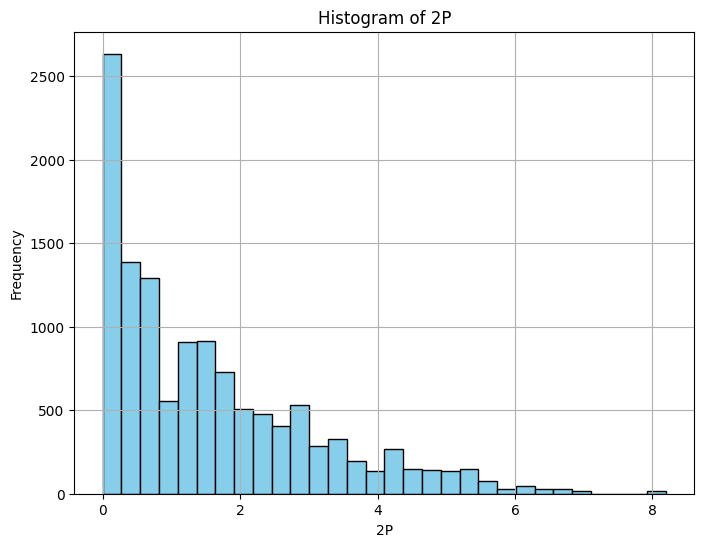

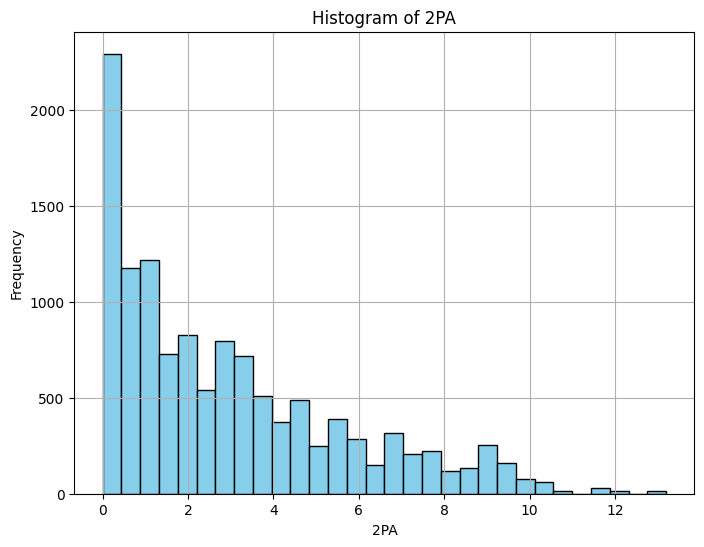

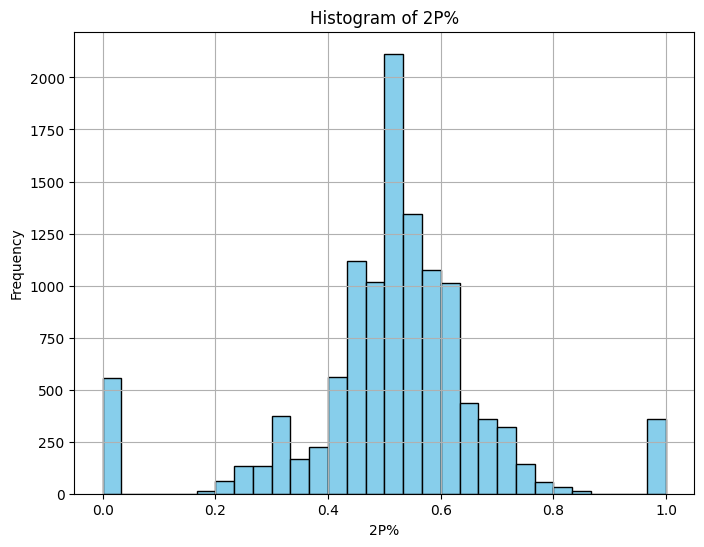

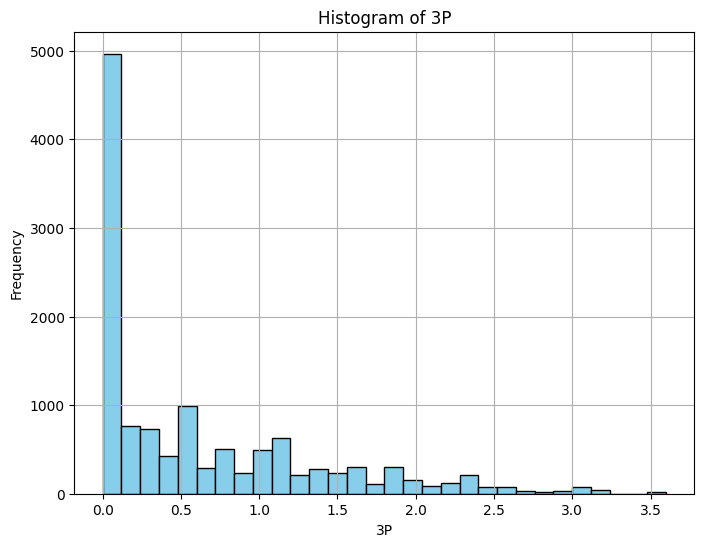

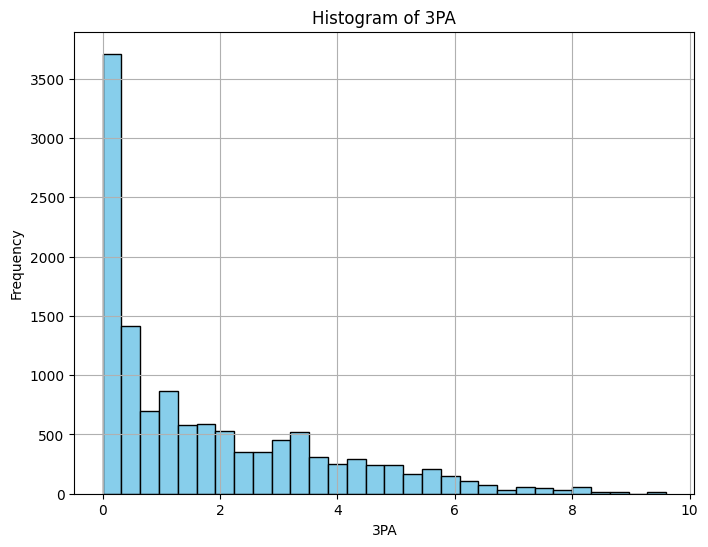

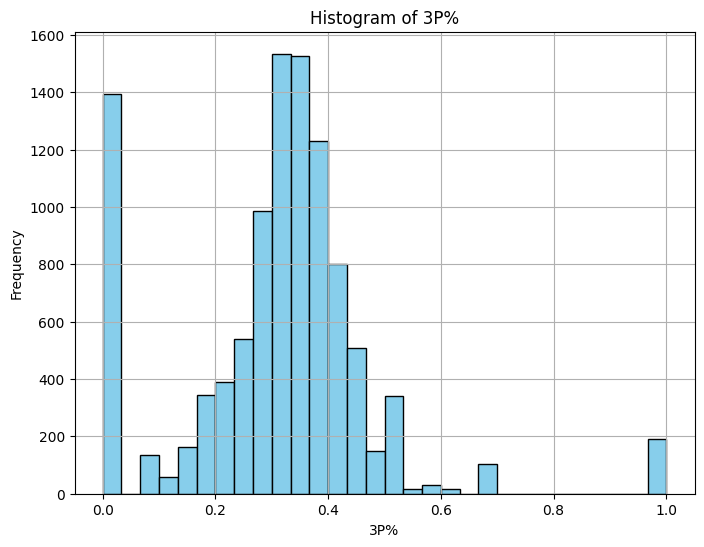

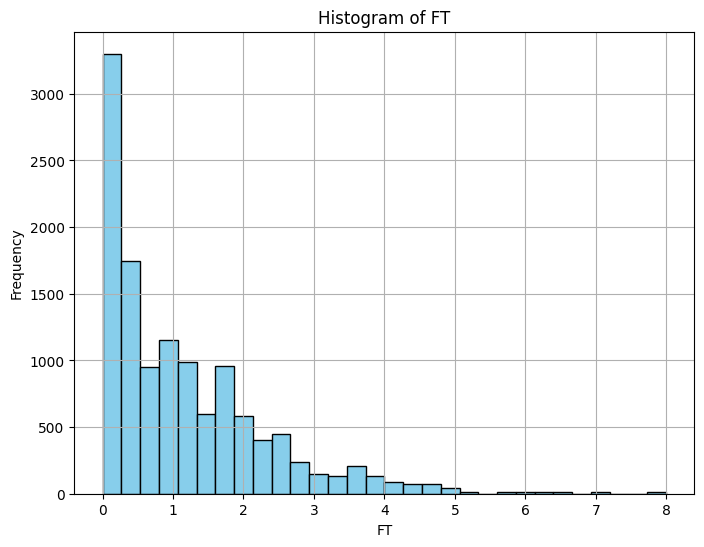

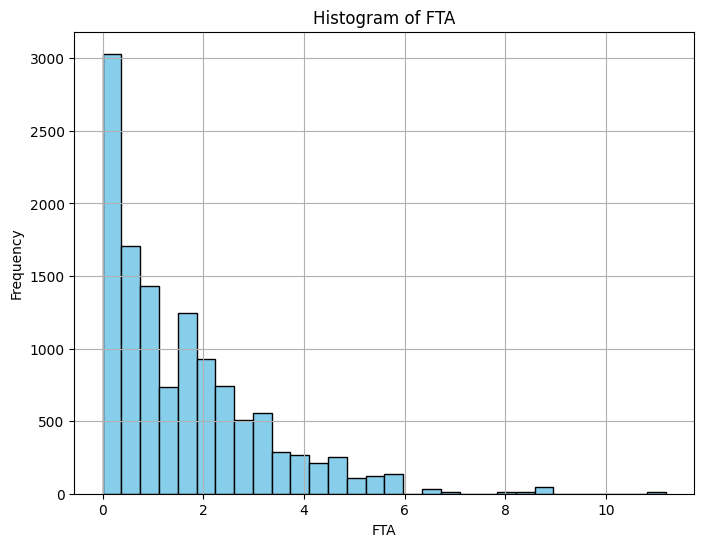

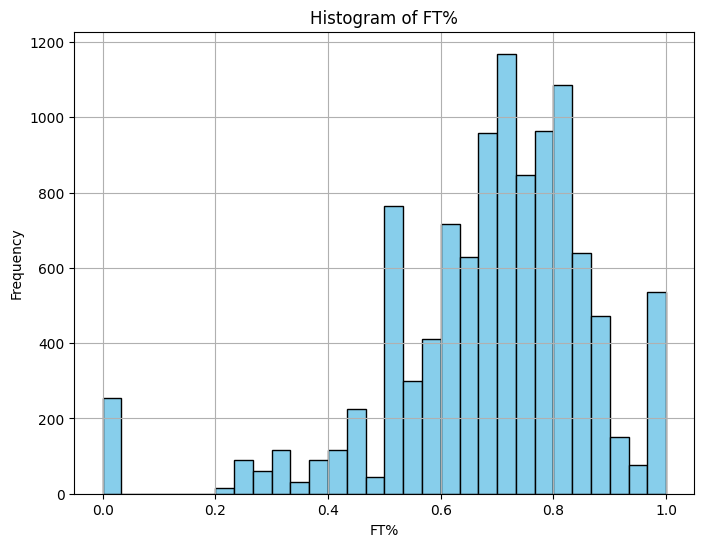

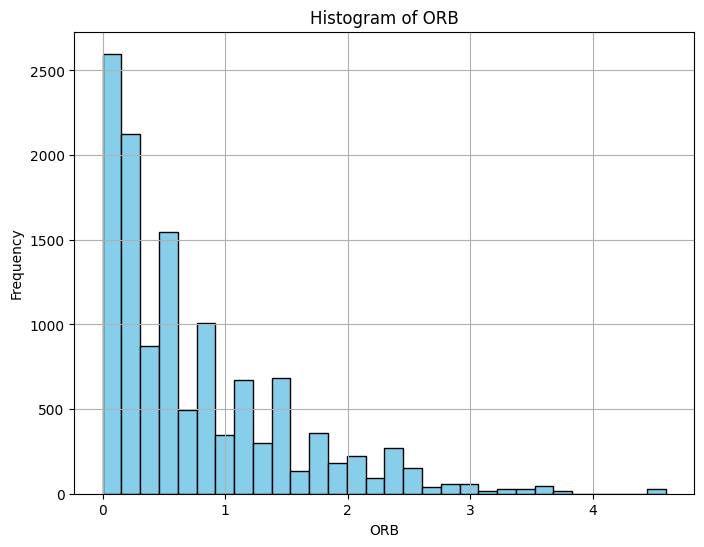

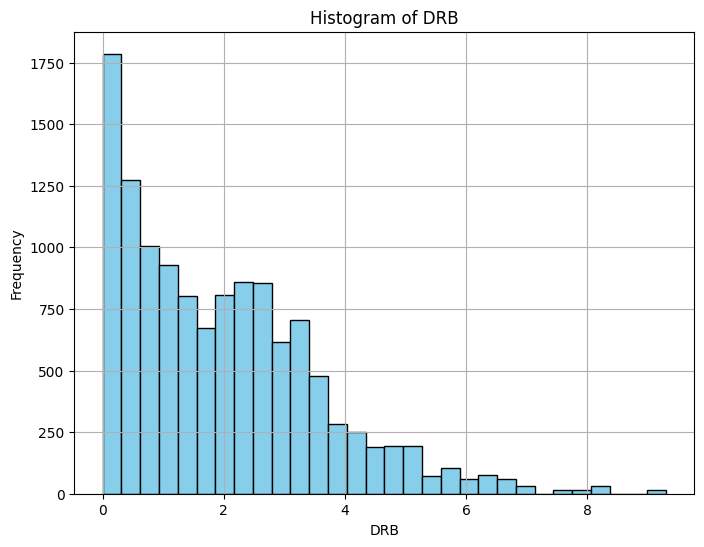

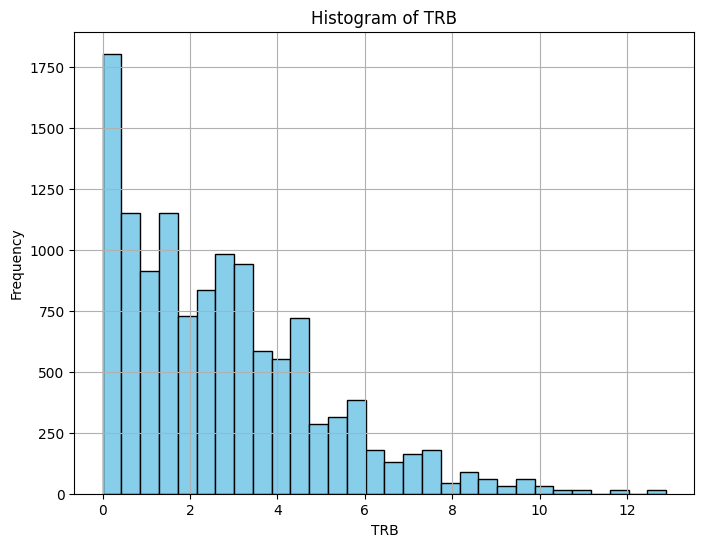

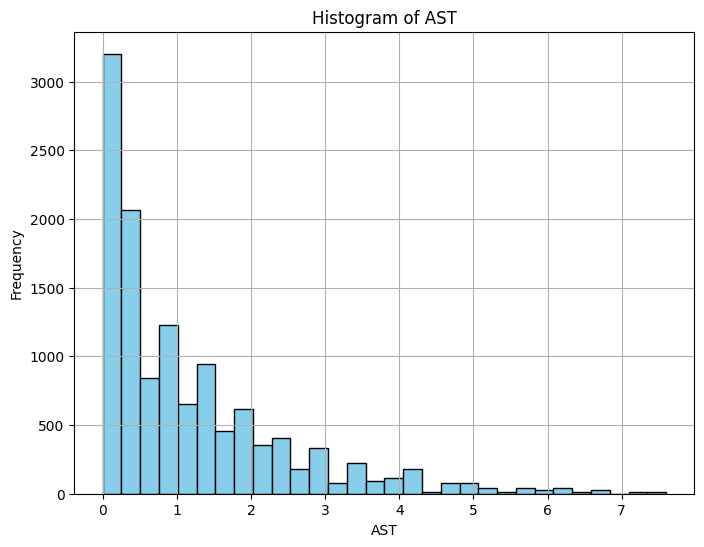

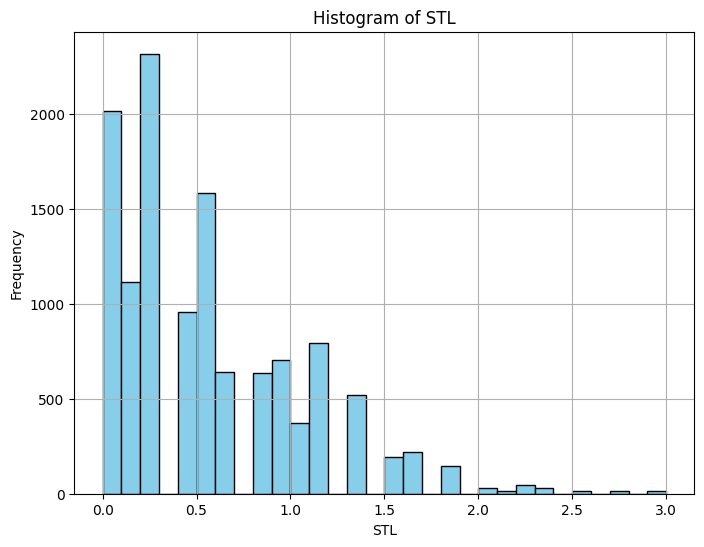

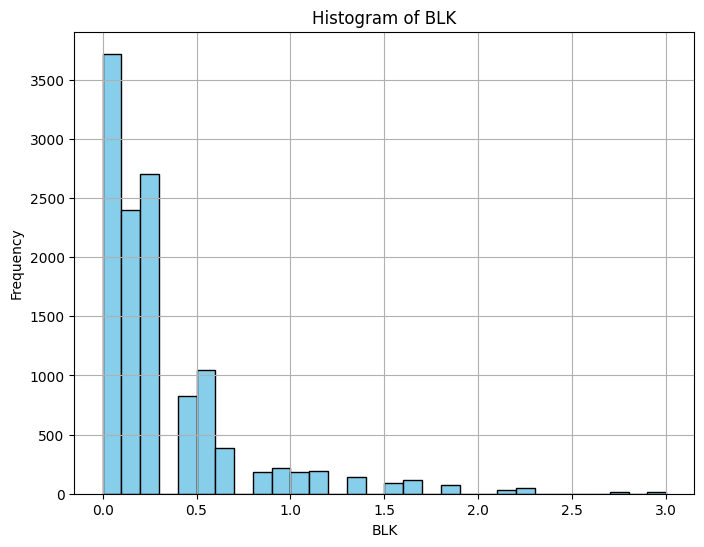

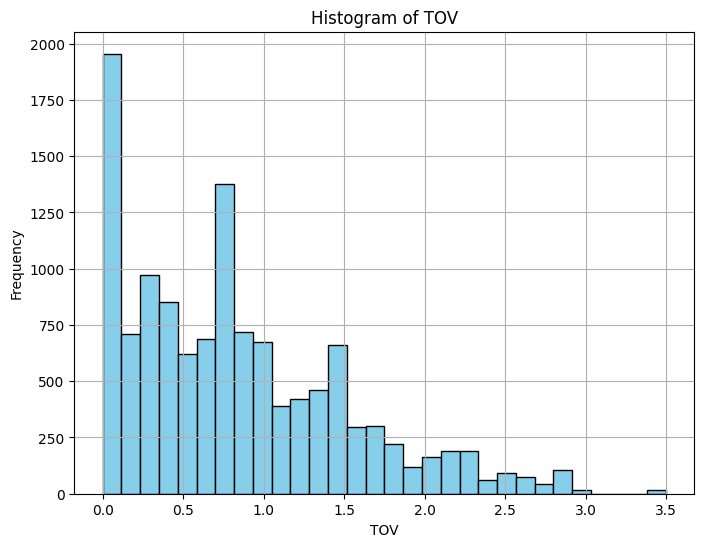

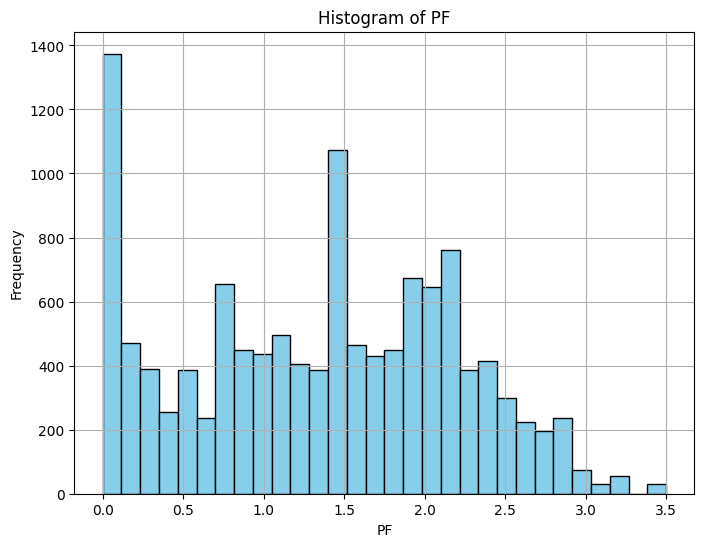

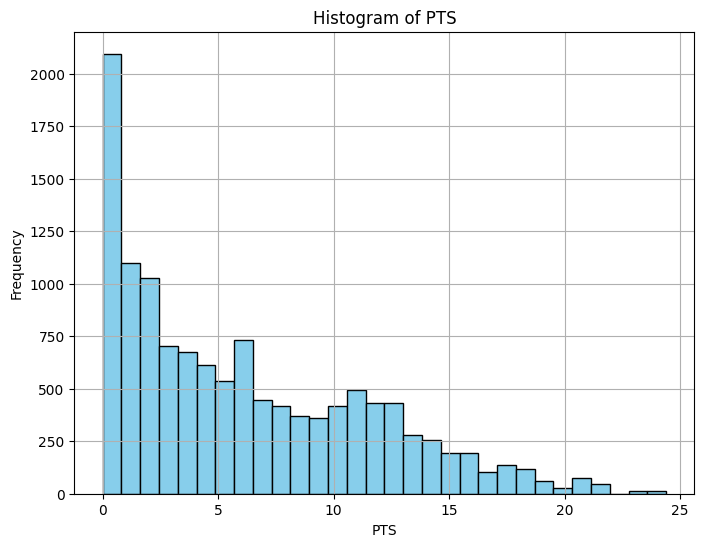

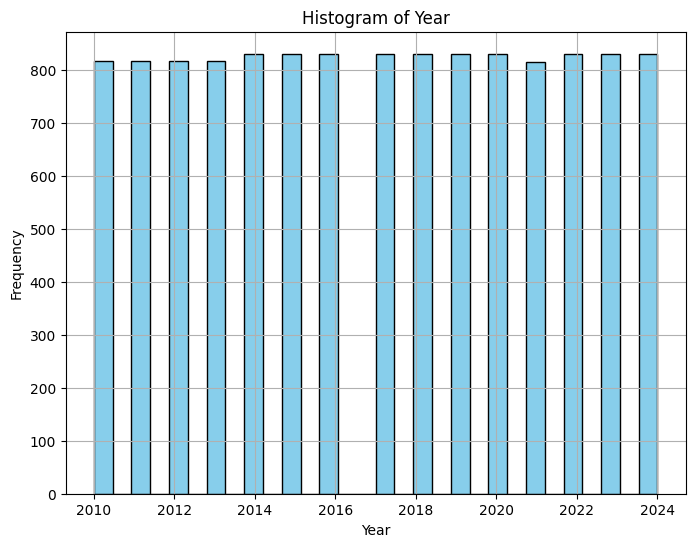

In [4]:
# Examine each variable

def plot_histograms(col_names):
    for column in col_names:
        plt.figure(figsize=(8, 6))
        plt.hist(data[str(column)], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

plot_histograms(col_names[3:])


In [5]:
def describe_all(col_names):
  for column in col_names:
    print(data[str(column)].describe())

describe_all(col_names)

count    12378.000000
mean      6188.500000
std       3573.365151
min          0.000000
25%       3094.250000
50%       6188.500000
75%       9282.750000
max      12377.000000
Name: Unnamed: 0, dtype: float64
count    12378.000000
mean         7.633220
std          4.222031
min          1.000000
25%          4.000000
50%          8.000000
75%         11.000000
max         18.000000
Name: Rk, dtype: float64
count           12378
unique            829
top       Isaac Jones
freq               30
Name: Player, dtype: object
count    12378.000000
mean        24.011553
std         11.017769
min          1.000000
25%         14.000000
50%         30.000000
75%         33.000000
max         36.000000
Name: G, dtype: float64
count    12378.000000
mean        11.852480
std         13.855289
min          0.000000
25%          0.000000
50%          2.000000
75%         28.000000
max         36.000000
Name: GS, dtype: float64
count    12378.000000
mean        16.091929
std         10.929882
min    

In [6]:
correlation = data.corr()
PTS_corr= correlation['PTS']
print(PTS_corr)

Unnamed: 0    0.000220
Rk           -0.922931
G             0.647062
GS            0.834106
MP            0.920118
FG            0.989866
FGA           0.980973
FG%           0.237113
2P            0.882998
2PA           0.910918
2P%           0.130257
3P            0.710615
3PA           0.711356
3P%           0.259315
FT            0.910708
FTA           0.889089
FT%           0.349618
ORB           0.528677
DRB           0.820472
TRB           0.767487
AST           0.694419
STL           0.725164
BLK           0.439554
TOV           0.847132
PF            0.709519
PTS           1.000000
Year          0.000211
Name: PTS, dtype: float64


<ipython-input-6-5d583f5d30e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


In [7]:
Above_point_eight = ['GS', 'MP', 'FG', 'FGA','2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'DRB', 'TOV']
test = ['GS', 'MP', 'FG']

In [14]:
# Standardize X
num_obs = len(data['GS'])
X_obs = np.zeros((num_obs,13))
intercept = np.ones((num_obs,1))
X_obs[:, 0] = intercept.reshape(-1)

i = 1
while i < len(Above_point_eight):
  for var in Above_point_eight:
    X_obs[:,i] = (data[var] - np.mean(data[var]))/np.std(data[var])
    i += 1

print(X_obs)

[[ 1.          1.59855308  1.55617034 ...  2.4563736   2.27798207
   2.61723825]
 [ 1.          1.59855308  1.54702074 ...  0.52391021  0.95856609
   0.39885902]
 [ 1.          1.52637556  1.40977675 ...  0.00858664  1.08422475
   0.25096707]
 ...
 [ 1.         -0.85548264 -1.34425267 ... -1.02206049 -1.24046056
  -1.22795242]
 [ 1.         -0.85548264 -1.33510307 ... -0.8932296  -1.05197256
  -1.22795242]
 [ 1.         -0.78330512 -1.25275667 ... -0.95764505 -1.05197256
  -1.22795242]]


In [15]:
X = data[test]
Y = data[['PTS']]

# normalize X and Y
X = (X - np.mean(X)) / np.std(X)
Y = (Y - np.mean(Y)) / np.std(Y)

n,p=X.shape[0],3

# MLR with no multi-variate normal on the betas
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0) # half normal
    y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=Y)

with MLR:
    idata = pm.sample()


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


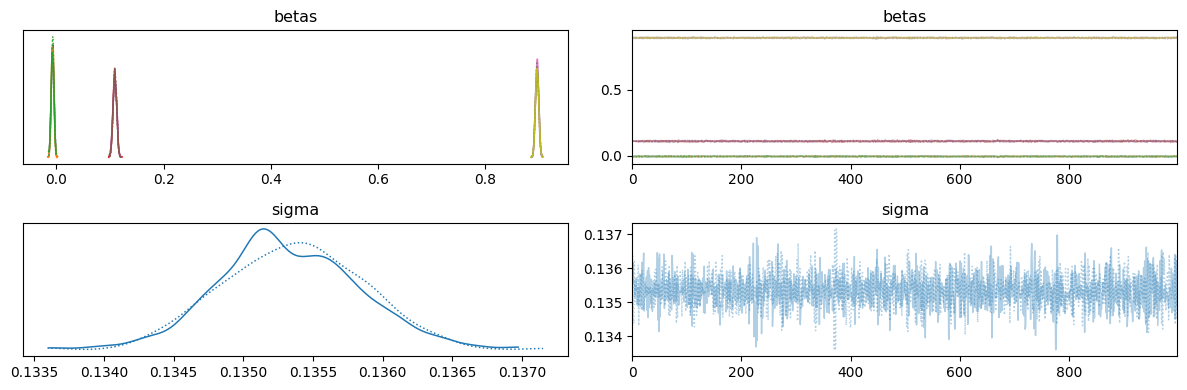

In [16]:
# Trace plots
az.plot_trace(idata)
plt.tight_layout()

In [17]:
Psi=np.eye(p)
a_cov = stats.invwishart(df=p+2, scale=Psi).rvs(1)
y=X

# MLR with LKJ prior on the Cov and Multi-variate normal on the betas
with pm.Model() as MNV_LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0,
                                 sd_dist=pm.InverseGamma.dist(alpha = 1, beta = 1, shape = 2), compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L)
    mu = pm.MvNormal('mu', mu=np.array(0), cov=np.eye(p), shape=p);
    y = pm.MvNormal('y', mu=mu, chol=L, shape=(n,1), observed=y)

with MNV_LKJ:
  idata = pm.sample()

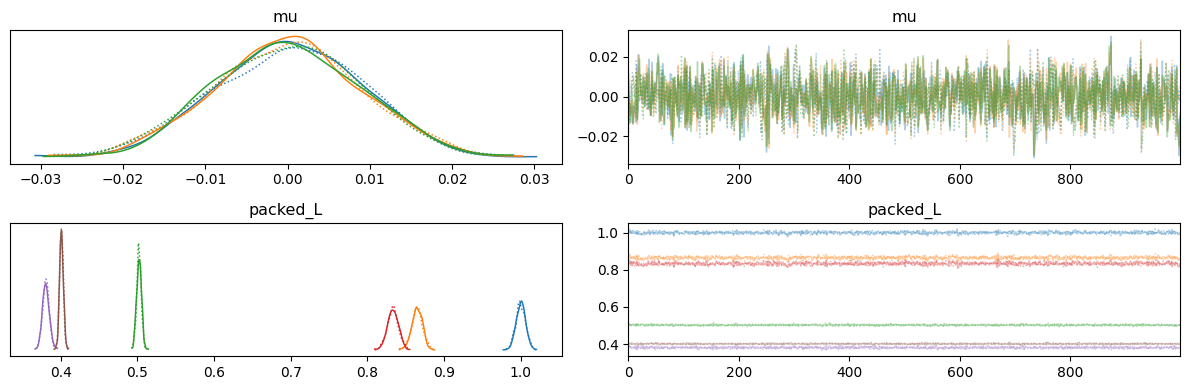

In [18]:
# Trace plots
az.plot_trace(idata)
plt.tight_layout()

In [1]:
# The old model -- probably not gonna use, old stuff from here on

with pm.Model() as MLR:
    X = pm.MutableData("X", data[Above_point_eight])
    y = pm.MutableData("Y", data['PTS'])

    # Need priors on each beta
    beta_gs = pm.HalfNormal('beta_gs', sigma = 50)
    beta_mp = pm.HalfNormal('beta_mp', sigma = 50)
    beta_fg = pm.HalfNormal('beta_fg', sigma = 50)
    beta_fga = pm.HalfNormal('beta_fga', sigma = 50)
    beta_2p= pm.HalfNormal('beta_2p', sigma = 50)
    beta_2pa= pm.Exponential('beta_2pa', lam = 50)
    beta_3p= pm.Exponential('beta_3p', lam = 50)
    beta_3pa= pm.Exponential('beta_3pa', lam = 50)
    beta_ft= pm.Exponential('beta_ft', lam = 50)
    beta_fta= pm.Exponential('beta_fta', lam = 50)
    beta_drb= pm.HalfNormal('beta_drb', sigma = 50)
    beta_tov= pm.HalfNormal('beta_tov', sigma = 50)

    betas = pm.math.stack([beta_gs, beta_mp, beta_fg, beta_fga, beta_2p, beta_2pa, beta_3p, beta_3pa, beta_ft, beta_fta, beta_drb, beta_tov])

    mu = pm.math.dot(X, betas)

    sigma = pm.HalfCauchy('sigma', beta=10)

    likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=y)

with MLR:
    idata = pm.sample()

In [ ]:
import arviz as az
print(data[Above_point_eight])

# Trace plots
az.plot_trace(idata)
plt.tight_layout()

       GS    MP   FG   FGA   2P  2PA   3P  3PA   FT  FTA  DRB  TOV
0      34  33.1  4.5  11.0  2.8  5.6  1.8  5.4  4.4  5.4  5.6  2.6
1      34  33.0  4.9  10.0  2.3  4.2  2.6  5.8  2.1  2.4  3.5  1.1
2      33  31.5  5.1  10.2  2.9  4.6  2.2  5.6  1.5  1.6  3.7  1.0
3      27  21.9  5.0   7.9  5.0  7.7  0.1  0.2  2.4  4.2  4.6  0.8
4      24  26.8  3.9   8.3  3.3  6.3  0.6  2.0  2.4  3.2  2.9  1.5
...    ..   ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...
12373   0   5.7  0.8   2.1  0.8  1.4  0.0  0.6  0.7  0.8  1.1  0.5
12374   0   3.8  0.4   0.8  0.3  0.5  0.1  0.3  0.1  0.2  0.1  0.2
12375   0   1.4  0.1   0.6  0.0  0.0  0.1  0.6  0.0  0.0  0.0  0.0
12376   0   1.5  0.2   0.4  0.2  0.4  0.0  0.0  0.0  0.2  0.3  0.0
12377   1   2.4  0.1   0.4  0.1  0.2  0.1  0.2  0.1  0.1  0.3  0.0

[12378 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Generate out of sample prediction on the old model

# Generate random arrays to predict on
x_to_pred = []

for i in range(10):
  x_to_pred.append(list(np.random.randint(100, size=(12))))

x_to_pred = pd.DataFrame(x_to_pred)

with MLR:
    pm.set_data({"X": x_to_pred})
    pred = pm.sample_posterior_predictive(idata, predictions=True)

az.plot_posterior(pred, group="predictions");

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12378,) and arg 1 with shape (10,).
Apply node that caused the error: normal_rv{0, (0, 0), floatX, True}(RandomGeneratorSharedVariable(<Generator(PCG64) at 0x7BAD74FDF840>), MakeVector{dtype='int64'}.0, 11, CGemv{inplace}.0, sigma)
Toposort index: 6
Inputs types: [RandomGeneratorType, TensorType(int64, shape=(1,)), TensorType(int64, shape=()), TensorType(float64, shape=(None,)), TensorType(float64, shape=())]
Inputs shapes: ['No shapes', (1,), (), (10,), ()]
Inputs strides: ['No strides', (8,), (), (8,), ()]
Inputs values: [Generator(PCG64) at 0x7BAD74FDF840, array([12378]), array(11), 'not shown', array(0.07121022)]
Outputs clients: [['output'], ['output']]

HINT: Re-running with most PyTensor optimizations disabled could provide a back-trace showing when this node was created. This can be done by setting the PyTensor flag 'optimizer=fast_compile'. If that does not work, PyTensor optimizations can be disabled with 'optimizer=None'.
HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.